In [1]:

# Basic
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

# Viz
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import category_encoders as ce
from sklearn.preprocessing import FunctionTransformer # custom transformer helper function
from sklearn.base import BaseEstimator, TransformerMixin # custom transformer


sklearn.set_config(enable_metadata_routing=True)
# Save and Load Model
import joblib


# Modeling
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet



# Metrics (Evaluasi Model)
from sklearn.metrics import r2_score, mean_absolute_error


# Model selection
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

# Warning
import warnings
warnings.filterwarnings('ignore')



In [2]:
df = df = pd.read_csv(r'C:\Users\Hewlett Packard\Desktop\SAYA\project-3-ml-bigmart-sales-demand\data\bigmart.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


>## Data Preprocessing 


### Columns that be dropped
* `Outlet_Establishment_Year`
* `Outlet_Identifier`
* `Item_Identifier`
* `Item_Outlet_Sales`

### Custom data prep
* Visibility zero handling
* Fat standardizer
* Rare handler
* Outlet size imputer

### Column transformer data prep  
**Numerical**(Continues)
* `Item_Weight`  standard scaling  
* `Item_Visibility`  standard scaling
* `Item_MRP`  standard scaling  
all of them are not contain extreme outlier

**Categorical nominal**  
* `Item_Type`  binary encoding  (too much unique values)
* `Item_Fat_Content`  one hot encoding  
* `Outlet_Type`  one hot encoding
* `Outlet_Establishment_Year` ← (it's role here is categoric) one hot encoding

**Ordinal**
* `Outlet_Location_Type ` ordinal encoding  
* `Outlet_Size`  ordinal encoding  
datanya berjenjang

## Data Splitting

In [3]:
features = df.drop(columns=["Outlet_Identifier", "Item_Identifier", "Item_Outlet_Sales", "Outlet_Establishment_Year"]).columns.to_list()
target = ["Item_Outlet_Sales"]

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=2026,  # supaya hasilnya konsisten 
)

## Custom Data Preprocessing



### **`Item_Type` Grouping**

In [4]:
food_and_beverages = [
    "Breads", "Breakfast", "Canned", "Frozen Foods", "Hard Drinks", "Soft Drinks", "Snack Foods"]
food_ingredients = [
    "Dairy", "Meat", "Seafood", "Fruits and Vegetables", "Starchy Foods", "Baking Goods"]
Others = ["Household", "Health and Hygiene", "Others"]

In [5]:
item_group_map = {}

for item in food_and_beverages:
    item_group_map[item] = "Food and Beverages"

for item in food_ingredients:
    item_group_map[item] = "Food Ingredients"


In [6]:
def map_item_group_drop_original(X):
    X = X.copy()
    X["Item_Group"] = X["Item_Type"].map(item_group_map).fillna("Other")
    X = X.drop(columns=["Item_Type"])
    return X


In [7]:
item_group_transformer = FunctionTransformer(
    map_item_group_drop_original)

**Function testing**

In [8]:
X_train_temp = X_train.copy()

In [9]:
X_train_temp = item_group_transformer.fit_transform(X_train_temp)

In [10]:
X_train_temp["Item_Group"]

6057    Food and Beverages
4390                 Other
2462      Food Ingredients
6218                 Other
6776      Food Ingredients
               ...        
7167    Food and Beverages
5661    Food and Beverages
6477    Food and Beverages
2125      Food Ingredients
2305      Food Ingredients
Name: Item_Group, Length: 6818, dtype: object

In [11]:
X_train_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6818 entries, 6057 to 2305
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           5648 non-null   float64
 1   Item_Fat_Content      6818 non-null   object 
 2   Item_Visibility       6818 non-null   float64
 3   Item_MRP              6818 non-null   float64
 4   Outlet_Size           4918 non-null   object 
 5   Outlet_Location_Type  6818 non-null   object 
 6   Outlet_Type           6818 non-null   object 
 7   Item_Group            6818 non-null   object 
dtypes: float64(3), object(5)
memory usage: 479.4+ KB


### **Visibility Zero Handling**

In [12]:

class ZeroToNaNTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X[self.column] = X[self.column].replace(0, np.nan)
        return X


In [13]:
visibility_zero_handler = ZeroToNaNTransformer(column="Item_Visibility")

**Function testing**

In [14]:
X_train_temp = X_train.copy()

In [15]:
X_train_temp.isna().sum()

Item_Weight             1170
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Size             1900
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [16]:
# Apply the ZeroToNaNTransformer to 'Item_Visibility' column in X_train_temp(testing df)
X_train_temp = visibility_zero_handler.fit_transform(X_train_temp)

In [17]:
X_train_temp.isna().sum()

Item_Weight             1170
Item_Fat_Content           0
Item_Visibility          427
Item_Type                  0
Item_MRP                   0
Outlet_Size             1900
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

### **Fat Standardizer**

In [18]:
# Function to standardize 'Item_Fat_Content' that apply to entire dataframe
def fat_standardizer(X):
    X = X.copy()

    col = "Item_Fat_Content"

    X[col] = (
        X[col]
        .str.lower()
        .str.strip()
        .replace({
            "lf": "low fat",
            "low fat": "low fat",
            "reg": "regular",
            "regular": "regular",
        })
    )

    return X


In [19]:
# Import FunctionTransformer
fat_standardizer_transformer = FunctionTransformer(
    fat_standardizer,
    validate=False
)

**Function testing**

In [20]:
X_train_temp = X_train.copy()

In [21]:
X_train_temp = fat_standardizer_transformer.transform(X_train_temp)

In [22]:
X_train_temp["Item_Fat_Content"].unique()

array(['regular', 'low fat'], dtype=object)

### **Rare Handler**

Secara umum berdasarkan section EDA , tidak ada rare type pada `Item_Type`. Namun hal ini tetap dilakukan sebagai penanganan potensi salah input

In [23]:

def replace_rare_categories(X, threshold=0.01, columns=None):
    X = X.copy()
    for col in columns:
        freq = X[col].value_counts(normalize=True)
        rare_categories = freq[freq < threshold].index
        X[col] = X[col].replace(rare_categories, "Other")
    return X


In [24]:
rare_transformer = FunctionTransformer(
    replace_rare_categories,
    kw_args={"columns": ["Item_Group"]},
    validate=False
)


### **Outlet Size Imputer**

Some `Outlet_Size` values were missing. These can generally be filled in using the `Outlet_Type` information.

In [25]:
def outlet_size_imputer(X):
    X = X.copy()

    outlet_size_map = (
        X.groupby("Outlet_Type")["Outlet_Size"]
         .agg(lambda x: x.mode().iloc[0])
    )

    global_mode = X["Outlet_Size"].mode().iloc[0]

    X["Outlet_Size"] = (
        X["Outlet_Size"]
        .fillna(X["Outlet_Type"].map(outlet_size_map))
        .fillna(global_mode)
    )

    return X


In [26]:
outlet_size_transformer = FunctionTransformer(
    outlet_size_imputer,
    validate=False
)


**Function testing**

In [27]:
X_train_temp = X_train.copy()

In [28]:
X_train_temp = outlet_size_transformer.transform(X_train_temp)

In [29]:
X_train_temp.isna().sum()

Item_Weight             1170
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Size                0
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

### Outlet Type Simplifier

In [30]:
supermarket = ["Supermarket Type1", "Supermarket Type2", "Supermarket Type3"]
grocery = ["Grocery Store"]


In [31]:
outlet_group_map = {}

for outlet in supermarket:
    outlet_group_map[outlet] = "Supermarket"

for outlet in grocery:
    outlet_group_map[outlet] = "Grocery Store"

In [32]:
def outlet_group_drop_original(X):
    X = X.copy()
    X["Outlet_Group"] = X["Outlet_Type"].map(outlet_group_map)
    X = X.drop(columns=["Outlet_Type"])
    return X


In [33]:
outlet_group_transformer = FunctionTransformer(
    outlet_group_drop_original)

**Function Testing**

In [34]:
X_train_temp = X_train.copy()

In [35]:
X_train_temp = outlet_group_transformer.transform(X_train_temp)

In [36]:
X_train_temp["Outlet_Group"]

6057      Supermarket
4390      Supermarket
2462      Supermarket
6218      Supermarket
6776    Grocery Store
            ...      
7167      Supermarket
5661      Supermarket
6477      Supermarket
2125      Supermarket
2305      Supermarket
Name: Outlet_Group, Length: 6818, dtype: object

## Column Transformer Preprocessing

In [37]:
ordinal_cols = ["Outlet_Size", "Outlet_Location_Type"]

ordinal_categories = [
    ['Small', 'Medium', 'High'],                # Outlet_Size
    ['Tier 3', 'Tier 2', 'Tier 1']               # Outlet_Location_Type
]

### **Column Transformer Pipeline**

In [38]:
ct_preprocess = ColumnTransformer(
    transformers=[
        # NUMERIC
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), ["Item_Weight", "Item_Visibility", "Item_MRP"]),

        # NOMINAL CATEGORICAL
        ("nom", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("ohe", OneHotEncoder(drop="first", handle_unknown="ignore"))
        ]), ["Item_Fat_Content", "Outlet_Group", "Item_Group"]),

        # ORDINAL
        ("ord", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")), 
            ("ordinal", OrdinalEncoder(
                categories=ordinal_categories,
                handle_unknown="use_encoded_value",
                unknown_value=-1
            ))
        ]), ordinal_cols),
    ],
    remainder="passthrough"
)


### **Main Pipeline**

In [39]:
pipe = Pipeline([
    ("item_group_transformer", item_group_transformer),
    ("visibility_zero_handler", visibility_zero_handler),
    ("fat_standardizer", fat_standardizer_transformer),
    ("rare_handler", rare_transformer),
    ("outlet_size_imputer", outlet_size_transformer),
    ("outlet_group_transformer", outlet_group_transformer),
    ("preprocess", ct_preprocess),
])


### **Pipeline Testing**

In [40]:
X_train_prep = pipe.fit_transform(X_train)
X_test_prep  = pipe.transform(X_test)

In [41]:
X_train_prep.shape


(6818, 9)

In [42]:
X_test_prep.shape


(1705, 9)

In [43]:
display(np.isnan(X_train_prep).any())
display(np.isinf(X_train_prep).any())

np.False_

np.False_

In [44]:
X_train_prep[:5]


array([[-0.05961067,  1.18875611,  0.7406247 ,  1.        ,  1.        ,
         1.        ,  0.        ,  1.        ,  0.        ],
       [-0.8633839 , -0.29529132, -0.41067608,  0.        ,  1.        ,
         0.        ,  1.        ,  2.        ,  0.        ],
       [ 1.91436181, -0.15412297, -0.84297916,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  2.        ],
       [-0.32083697, -0.99129932,  0.16495342,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ],
       [ 1.2878915 , -0.53785343,  1.62011857,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ]])

In [45]:
pipe.named_steps["preprocess"].get_feature_names_out()


array(['num__Item_Weight', 'num__Item_Visibility', 'num__Item_MRP',
       'nom__Item_Fat_Content_regular', 'nom__Outlet_Group_Supermarket',
       'nom__Item_Group_Food and Beverages', 'nom__Item_Group_Other',
       'ord__Outlet_Size', 'ord__Outlet_Location_Type'], dtype=object)

### **Save Pipeline**

In [46]:

# NUM_COLS = ["Item_Weight", "Item_Visibility", "Item_MRP"]
# CAT_COLS = ["Item_Fat_Content", "Item_Type", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type", "Outlet_Establishment_Year"]

# joblib.dump(
#     {
#         "preprocessor": pipe,
#         "num_cols": NUM_COLS,
#         "cat_cols": CAT_COLS,
#         "target": "item_outlet_sales"
#     },
#     "preprocess_modified1_artifacts.joblib"
# )


In [47]:
artifacts = joblib.load("preprocess_modified1_artifacts.joblib")

In [48]:
artifacts["num_cols"]

['Item_Weight', 'Item_Visibility', 'Item_MRP']

In [49]:
artifacts["cat_cols"]

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Outlet_Establishment_Year']

In [50]:
artifacts["preprocessor"]

Pipeline(steps=[('item_group_transformer',
                 FunctionTransformer(func=<function map_item_group_drop_original at 0x0000025DB2F1F9C0>)),
                ('visibility_zero_handler',
                 ZeroToNaNTransformer(column='Item_Visibility')),
                ('fat_standardizer',
                 FunctionTransformer(func=<function fat_standardizer at 0x0000025D9E727EC0>)),
                ('rare_handler',
                 FunctionTransformer(func=<function rep...
                                                                                 handle_unknown='ignore'))]),
                                                  ['Item_Fat_Content',
                                                   'Outlet_Group',
                                                   'Item_Group']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Tier '
                                                                                               '3',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '1']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Outlet_Size',
                                                   'Outlet_Location_Type'])]))])

>## Modeling

In this modeling phase, several algorithms were explored, including OLS, Random Forest, Gradient Boosting, Extra Trees, Ridge, and Lasso. Model performance was evaluated using MAE and R².


## Baseline Linear Model

### OLS

In [51]:
# OLS with linear regression
ols_pipeline = Pipeline([
    ("preprocess", pipe),
    ("model", LinearRegression())
])

ols_pipeline.fit(X_train, y_train)

y_pred = ols_pipeline.predict(X_test)
mae_ols = mean_absolute_error(y_test, y_pred)
r2_ols = r2_score(y_test, y_pred)

mae_ols, r2_ols

(901.6032322916345, 0.4919885407819573)

## Regularized Baseline Linear Model

### Ridge

In [52]:
# Ridge Regression
ridge_pipeline = Pipeline([
    ("preprocess", pipe),
    ("model", Ridge(alpha=1.0))
])

ridge_pipeline.fit(X_train, y_train)

y_pred = ridge_pipeline.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred)
r2_ridge = r2_score(y_test, y_pred)

mae_ridge, r2_ridge

(901.52147283551, 0.4920199344073606)

### Lasso

In [53]:
# Lasso Regression
lasso_pipeline = Pipeline([
    ("preprocess", pipe),
    ("model", Lasso(alpha=0.1))
])

lasso_pipeline.fit(X_train, y_train)

y_pred = lasso_pipeline.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred)
r2_lasso = r2_score(y_test, y_pred)

mae_lasso, r2_lasso

(901.5797290039076, 0.4919968123863131)

### Elasticnet

In [54]:
# ElasticNet Regression
ElasticNet_pipeline = Pipeline([
    ("preprocess", pipe),
    ("model", ElasticNet(alpha=0.1, l1_ratio=0.5))
])

ElasticNet_pipeline.fit(X_train, y_train)

y_pred = ElasticNet_pipeline.predict(X_test)
mae_elasticnet = mean_absolute_error(y_test, y_pred)
r2_elasticnet = r2_score(y_test, y_pred)

mae_elasticnet, r2_elasticnet

(907.1704535019763, 0.48051488824845123)

## Ensemble Model

### Random Forest

In [55]:
# Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_pipeline = Pipeline([
    ("preprocess", pipe),
    ("model", rf)
])
rf_pipeline.fit(X_train, y_train)

y_pred = rf_pipeline.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

mae_rf, r2_rf

(820.139556835777, 0.5459100300039312)

### Gradient Boost

In [56]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr_pipeline = Pipeline([
    ("preprocess", pipe),  # pakai preprocessing yang SAMA
    ("model", gbr)
])

gbr_pipeline.fit(X_train, y_train)

y_pred = gbr_pipeline.predict(X_test)
mae_gbr = mean_absolute_error(y_test, y_pred)
r2_gbr = r2_score(y_test, y_pred)

mae_gbr, r2_gbr

(766.153374841617, 0.5976204481198797)

### Extra Tree

In [57]:
# Extra Trees Regressor
etr = ExtraTreesRegressor(
    n_estimators=500,
    max_depth=None,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

etr_pipeline = Pipeline([
    ("preprocess", pipe),
    ("model", etr)
])

etr_pipeline.fit(X_train, y_train)

y_pred = etr_pipeline.predict(X_test)
mae_etr = mean_absolute_error(y_test, y_pred)
r2_etr = r2_score(y_test, y_pred)

mae_etr, r2_etr

(836.7392152700294, 0.5181091642314274)

### XGB

In [58]:
# XGBoost Regressor
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb_pipeline = Pipeline([
    ("preprocess", pipe),
    ("model", xgb)
])

xgb_pipeline.fit(X_train, y_train)

y_pred = xgb_pipeline.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)

mae_xgb, r2_xgb


(812.9840087890625, 0.5468263626098633)

## Summary of Model Performance

In [59]:
# Make a dataframe to compare model performance
R2_models = [r2_ols, r2_ridge, r2_lasso, r2_elasticnet, r2_gbr, r2_etr, r2_xgb]
model_names = [
    "OLS", "Ridge", "Lasso", "ElasticNet", 
    "GradientBoostingRegressor", "ExtraTreesRegressor", "XGBRegressor"
]
MAE_models = [mae_ols, mae_ridge, mae_lasso, mae_elasticnet, mae_gbr, mae_etr, mae_xgb]

pd.DataFrame({
    "Model": model_names,
    "MAE": MAE_models,
    "R2" : R2_models
})

,Model,MAE,R2
0,OLS,901.603232,0.491989
1,Ridge,901.521473,0.492020
2,Lasso,901.579729,0.491997
3,ElasticNet,907.170454,0.480515
4,GradientBoostingRegressor,766.153375,0.597620
5,ExtraTreesRegressor,836.739215,0.518109
6,XGBRegressor,812.984009,0.546826


## Hyperparameter Tuning
The selected model is **GradientBoostingRegressor**, as it achieves the lowest MAE (766) and the highest R² (0.59). This model was therefore chosen for hyperparameter tuning.


In [60]:

gbr = GradientBoostingRegressor(random_state = 2026)

param_dist = {
    'n_estimators': np.arange(50, 501, 50),
    'learning_rate': np.linspace(0.01, 0.2, 20),
    'max_depth': np.arange(2, 6),
    'min_samples_split': np.arange(2, 21),
    'min_samples_leaf': np.arange(1, 21),
    'subsample': np.linspace(0.6, 1.0, 5)
}

random_search_gbr = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist,
    n_iter=30,                 # jumlah kombinasi acak
    scoring='neg_mean_absolute_error',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rs_gbr_pipeline = Pipeline([
    ("preprocess", pipe),  # pakai preprocessing yang SAMA
    ("random_search_gbr", random_search_gbr)
])

rs_gbr_pipeline.fit(X_train, y_train)

print("Best params:", random_search_gbr.best_params_)
print("Best CV MAE:", -random_search_gbr.best_score_)



Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params: {'subsample': np.float64(0.8), 'n_estimators': np.int64(350), 'min_samples_split': np.int64(18), 'min_samples_leaf': np.int64(19), 'max_depth': np.int64(4), 'learning_rate': np.float64(0.02)}
Best CV MAE: 766.7610383749947


In [61]:
y_pred = rs_gbr_pipeline.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

In [62]:
print("Test MAE:", mae_test)
print("Test R² :", r2_test)


Test MAE: 761.2604401730594
Test R² : 0.5994685601520426


Hyperparameter tuning did not result in a significant performance improvement, indicating that the model has likely reached its current performance limit.
The model’s R² is relatively low, while the MAE is fairly high compared to the average target value (761 vs. 2,181). This indicates that the model still struggles to capture a substantial portion of the variability in sales. To improve performance, additional data is required—particularly supporting features. In this context, incorporating time series data is recommended, as it may better capture temporal patterns and demand dynamics.


>## Residual Analysis

Residual analysis is the process of examining prediction errors (residuals) to ensure that they are randomly distributed and do not follow systematic patterns, which indicates that the model is appropriate for the data. Through residual analysis, potential violations of model assumptions can be identified, such as non-linear relationships, non-constant error variance (heteroskedasticity), influential outliers, and dependence between errors. These issues suggest that the model may require improvement or adjustment.


In [63]:
residual = pd.DataFrame(y_test.values.flatten() - y_pred)


In [64]:
residual

,0
0,-133.039907
1,471.012298
2,325.590922
3,-3307.697784
4,516.881257
...,...
1700,106.730736
1701,89.933235
1702,-1236.204620
1703,-726.231117


<Axes: ylabel='Count'>

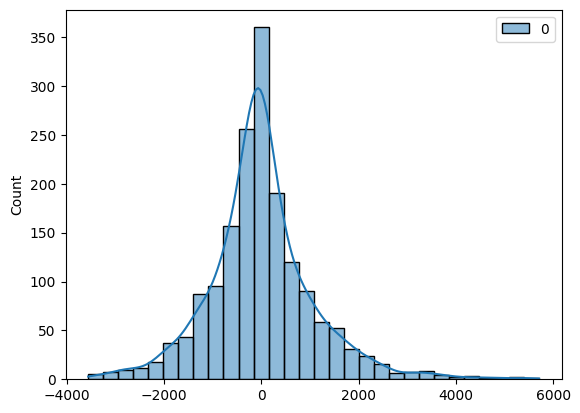

In [65]:
sns.histplot(residual, bins=30, kde=True)

Text(0.5, 1.0, 'Residuals vs Predicted Values')

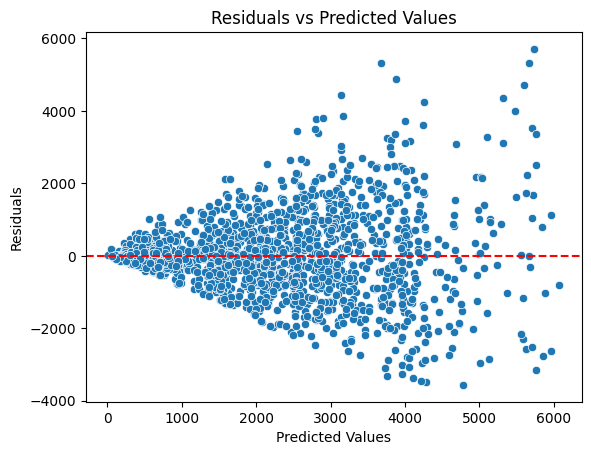

In [66]:
sns.scatterplot(x=y_pred, y=residual.values.flatten())
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

* The data shows uneven variability across different sales levels. Although this does not significantly impact overall predictions, the model may be less accurate for specific segments with more diverse sales patterns.


## Conclusion

**Modeling**  
Given the available data and preprocessing steps, the model appears to have reached its current performance limit. The relatively high MAE and low R² indicate that further performance improvements would likely require additional or more informative data. A key takeaway from this project is that model capability is often constrained by data quality and availability, and this limitation needs to be acknowledged.

**Notebook & Preprocessing**  
This project highlights that more complex preprocessing—such as the approach demonstrated in `learning-project-1-ml-bigmart-sales-demand-3b-alternate-preprocess.ipynb`—does not necessarily lead to better predictive performance. Separating notebooks improved workflow clarity, and the use of pipelines significantly reduced development time. Overall, a clean, structured workflow can have a greater impact than overly sophisticated preprocessing techniques.
